In [ ]:
# 3D 데이터셋을 2D에 투영하도록 AutoEncoder를 만들어보자
# 선형 오토 인코더 (Activation function을 선형으로 사용) 
# 제프리 힌튼 discussion에 따르면 선형 AE 구축하면-> PCA와 결과가 동일해짐
# 완전 과소 autoencoder의 구현

# 1. encoder와 decoder로 구성
# 2. input, output shape이 같다
# 3. 선형 AE 구현을 위해 activation function은 없고,
# 4. cost-function은 MSE 사용


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2024)

def generate_3d_data(m, w1 = 0.1, w2 = 0.3, noise = 0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3)) # create an empty array
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) + 0.7 + noise  * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m) / 2
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [2]:
X_train.shape # 인덱스 에러 시 shape 확인

(60, 3)

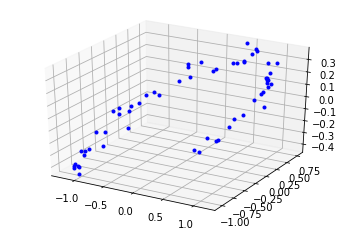

In [3]:
from matplotlib import projections
plt.gca(projection="3d")
plt.plot(X_train[:,0], X_train[:,1], X_train[:,2], "b.")

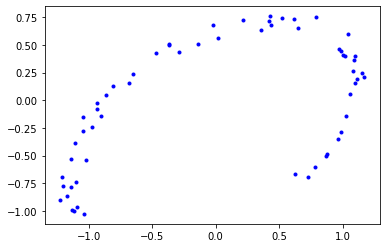

In [4]:
plt.plot(X_train[:,0], X_train[:,1], "b.")

In [5]:
# 학습이 잘되게 하기위해 랜덤 시드 고정
tf.random.set_seed(42)
np.random.seed(42)

encoder = tf.keras.models.Sequential([tf.keras.layers.Dense(2, input_shape = (3,))])
decoder = tf.keras.models.Sequential([tf.keras.layers.Dense(3, input_shape = (2,))]) # 인코더의 출력이 2라서 입력 2, 첫 입력값과 같은 3차원이 아웃풋 크기

autoencoder = tf.keras.models.Sequential([encoder, decoder])
sgd = tf.keras.optimizers.SGD(lr = 1.5)
autoencoder.compile(loss = "mse", optimizer = "sgd")

# loss값이 0에 가까울 수록 x_train 값이 encoder와 decoder를 거쳐 출력하는 값의 차이가 작아짐
autoencoder.fit(X_train, X_train, epochs = 40)

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


2/2 [==============================] - 2s 8ms/step - loss: 0.4219
Epoch 2/40
2/2 [==============================] - 0s 6ms/step - loss: 0.4180
Epoch 3/40
2/2 [==============================] - 0s 6ms/step - loss: 0.4139
Epoch 4/40
2/2 [==============================] - 0s 6ms/step - loss: 0.4101
Epoch 5/40
2/2 [==============================] - 0s 6ms/step - loss: 0.4063
Epoch 6/40
2/2 [==============================] - 0s 6ms/step - loss: 0.4027
Epoch 7/40
2/2 [==============================] - 0s 6ms/step - loss: 0.3992
Epoch 8/40
2/2 [==============================] - 0s 6ms/step - loss: 0.3958
Epoch 9/40
2/2 [==============================] - 0s 6ms/step - loss: 0.3924
Epoch 10/40
2/2 [==============================] - 0s 5ms/step - loss: 0.3890
Epoch 11/40
2/2 [==============================] - 0s 6ms/step - loss: 0.3858
Epoch 12/40
2/2 [==============================] - 0s 6ms/step - loss: 0.3828
Epoch 13/40
2/2 [==============================] - 0s 6ms/step - loss: 0.3798
Epoch 

In [6]:
# encoder 부분만 따로 떼와서 latent space를 확인한다.
codings = encoder.predict(X_train)
codings.shape

2/2 [==============================] - 0s 5ms/step


(60, 2)

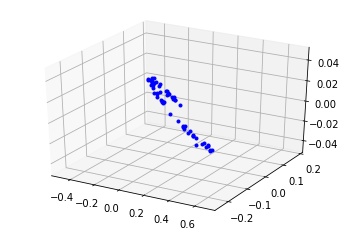

In [7]:
plt.gca(projection="3d")
plt.plot(codings[:, 0], codings[:, 1], "b.")

### Fashion MNIST dataset 활용

In [8]:
# stacked autoencoder
# mnist dataset 을 이용해 재구성한다.
# 목표 1: 이미지 data set에서도 재구성이 잘 일어나는가
# 목표 2 : data set 의 latent space 는 어떻게 표현되는지
# 28 x 28 -> latent space (30차원) 머신러닝 모델 T-SNE을 통해 2차원으로 compressed 해준다. 
 

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# 0~1 값으로 정규화 시켜준다 (학습 더 잘됨), 하지 않으면 loss값이 음수로 커짐
x_train_1 = x_train.astype(np.float32) / 255
x_train_2 = x_train / 255

# layer 구성
tf.random.set_seed(42)
np.random.seed(42)

4422102/4422102 [==============================] - 0s 0us/step


In [10]:
x_train_2

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [11]:
stacked_encoder = tf.keras.models.Sequential([
                                              tf.keras.layers.Flatten(input_shape=[28, 28]),
                                              tf.keras.layers.Dense(100, activation = "relu"),
                                              tf.keras.layers.Dense(30, activation = "relu")
                                              ])

stacked_decoder = tf.keras.models.Sequential([
                                              tf.keras.layers.Dense(100, activation = "relu", input_shape=(30, )),
                                              tf.keras.layers.Dense(28*28, activation = "sigmoid"),
                                              tf.keras.layers.Reshape([28, 28])
])

stacked_autoencoder = tf.keras.models.Sequential([stacked_encoder],[stacked_decoder])

In [12]:
stacked_decoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               3100      
                                                                 
 dense_5 (Dense)             (None, 784)               79184     
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 82,284
Trainable params: 82,284
Non-trainable params: 0
_________________________________________________________________


In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
def rounded_accuracy(y_true, y_pred):
  return tf.keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

sgd = tf.keras.optimizers.SGD(learning_rate = 1.5)
stacked_autoencoder.compile(loss = "binary_crossentropy", optimizer = sgd, metrics = [rounded_accuracy])

In [20]:
stacked_autoencoder

In [22]:
x_train_1.shape

(60000, 28, 28)

In [24]:
type(x_train_1)

numpy.ndarray

In [26]:
x_train_2.shape

(60000, 28, 28)

In [28]:
#stacked_autoencoder.fit(x_train_2, x_train_2, epochs = 20) # validation_split= 0.2